# Multiple Linear Regression

The data (X1, X2, X3, X4, X5, X6, X7) are for each city.

X1 = total overall reported crime rate per 1 million residents

X2 = reported violent crime rate per 100,000 residents

X3 = annual police funding in $/resident

X4 = % of people 25 years+ with 4 yrs. of high school

X5 = % of 16 to 19 year-olds not in highschool and not highschool graduates.

X6 = % of 18 to 24 year-olds in college

X7 = % of people 25 years+ with at least 4 years of college

Reference: Life In America's Small Cities, By G.S. Thomas

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

crime_df = pd.read_csv("../week_13/crime_data.csv")
crime_df.head()

,X1,X2,X3,X4,X5,X6,X7
0,478,184,40,74,11,31,20
1,494,213,32,72,11,43,18
2,643,347,57,70,18,16,16
3,341,565,31,71,11,25,19
4,773,327,67,72,9,29,24


<AxesSubplot:>

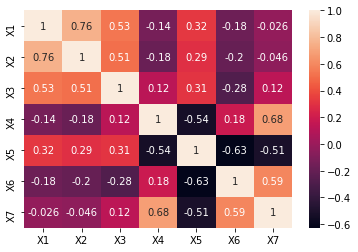

In [21]:
# for multiple linear regressions we need to use variables that
# are uncorrelated with eachother in out equation
correlation = crime_df.corr()
sns.heatmap(correlation,annot=True)

In [22]:
X = crime_df[['X2','X5']]
y = crime_df['X1']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=32)
#x1 = m2x2 + m5x5

In [25]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [26]:
y_pred = regression.predict(X_test)
accuracy_score = regression.score(X_test,y_test)
accuracy_score

0.4049121409018507

In [27]:
regression.coef_

array([0.53032549, 5.18172689])

In [28]:
# What is the equation for the model?
# x1 = 0.53x2 + 5.18x5

# OLS Regression

OLS (ordinary least squares) regression is a type of linear regression that lets you handle interactions as well as features that dont have interactions. So, you can incorporate features that are correlated with eachother.  

In [10]:
from statsmodels.formula.api import ols
diabetes_df = pd.read_csv("../week_13/diabetes.csv")
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
diabetes_df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [14]:
diabetes_vs_glucose = ols("Outcome ~ Glucose + ", data=diabetes_df).fit()
print(diabetes_vs_glucose.params)
intercept, slope = diabetes_vs_glucose.params
#outcome = -.49 + .007*glucose

Intercept   -0.492495
Glucose      0.006960
dtype: float64


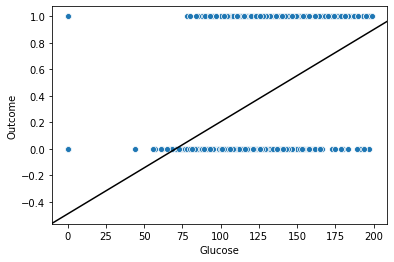

In [15]:
sns.scatterplot(x='Glucose',
               y='Outcome',
               data=diabetes_df)

plt.axline(xy1=(0,intercept),slope=slope,color="black")

In [ ]:
# really, OLS regression is not the answer for modeling this dataset because
# the outcomes are binary. In this scenario, we use logistic regression.